['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']


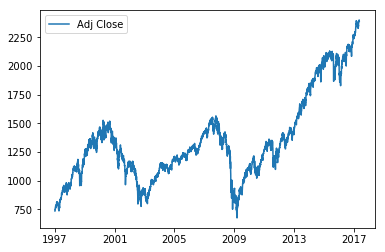

(5125, 5)


/home/hamid/dev/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


In [4]:
from pandas.tools.plotting import scatter_matrix
import pandas_datareader.data as web
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
pd.options.display.max_rows = 12
from sklearn import preprocessing
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
np.set_printoptions(precision=4, suppress=True)
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.models import load_model
import matplotlib.pyplot as plt2
import copy
import keras
import h5py
import requests
import os
import matplotlib.pyplot as plt
from pylab import pcolor, show, colorbar, xticks, yticks
plt.rc('figure', figsize=(12, 6))
%matplotlib inline


start = datetime.datetime(1997, 1, 1)
end = datetime.date.today()
df = web.DataReader('^GSPC', "yahoo", start, end)
print(df.columns.values.tolist())

dfBeforeNorm= copy.deepcopy(df)
dfBeforeNorm.head()
df.drop(['Close'], 1, inplace=True)
df.dropna(inplace=True)

plt.plot(df['Adj Close'], label='Adj Close')
plt.legend(loc='best')
plt.show()

min_max_scaler = preprocessing.MinMaxScaler()
for   name in df.columns.values.tolist():
 df[name] = min_max_scaler.fit_transform(df[name].values.reshape(-1,1))
df.head()
print (df.shape)


In [5]:
def load_data(stock, seq_len):
    amount_of_features = len(stock.columns)
    data = stock.as_matrix()
    sequence_length = seq_len + 1 # index starting from 0
    result = []

    for index in range(len(data) - sequence_length): # maxmimum date = lastest date - sequence length
        result.append(data[index: index + sequence_length]) # index : index + 22days

    result = np.array(result)
    row = round(0.9 * result.shape[0]) # 90% split

    train = result[:int(row), :] # 90% date
    X_train = train[:, :-1] # all data until day m
    y_train = train[:, -1][:,-1] # day m + 1 adjusted close price

    X_test = result[int(row):, :-1]
    y_test = result[int(row):, -1][:,-1]

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], amount_of_features))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], amount_of_features))

    return [X_train, y_train, X_test, y_test]



In [6]:
model = Sequential()
d = 0.3
decay=0.2
model.add(LSTM(64, input_shape=(22, 5), return_sequences=True))
model.add(Dropout(d))

model.add(LSTM(64, input_shape=(22, 5), return_sequences=False))
model.add(Dropout(d))

model.add(Dense(64,kernel_initializer="uniform",activation='relu'))
model.add(Dense(1,kernel_initializer="uniform",activation='linear'))
adam = keras.optimizers.Adam(decay=decay)
model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 22, 64)            17920     
_________________________________________________________________
dropout_3 (Dropout)          (None, 22, 64)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 55,169
Trainable params: 55,169
Non-trainable params: 0
_________________________________________________________________


In [7]:
window = 22
X_train, y_train, X_test, y_test = load_data(df, window)
print (X_train[0], y_train[0])

[[ 0.0357  0.0278  0.0363  0.0273  0.0351]
 [ 0.0335  0.031   0.0407  0.0264  0.0415]
 [ 0.0399  0.034   0.0446  0.0333  0.0413]
 [ 0.0397  0.0339  0.0437  0.0339  0.0445]
 [ 0.0429  0.0354  0.0469  0.0356  0.0417]
 [ 0.0401  0.0365  0.0473  0.0354  0.0455]
 [ 0.0439  0.0377  0.0464  0.0346  0.0482]
 [ 0.0466  0.0396  0.0521  0.0257  0.0482]
 [ 0.0466  0.0449  0.0537  0.0333  0.0536]
 [ 0.052   0.0443  0.0561  0.0327  0.0526]
 [ 0.051   0.0449  0.057   0.0338  0.0541]
 [ 0.0525  0.0475  0.0596  0.0336  0.0578]
 [ 0.0563  0.0496  0.0622  0.0253  0.0581]
 [ 0.0566  0.0518  0.0609  0.0368  0.0616]
 [ 0.0601  0.0532  0.0653  0.0384  0.0637]
 [ 0.0621  0.0582  0.0636  0.0469  0.0586]
 [ 0.0571  0.0485  0.0587  0.0343  0.0545]
 [ 0.053   0.0446  0.0564  0.0257  0.0514]
 [ 0.0498  0.0474  0.055   0.0342  0.0514]
 [ 0.0498  0.0453  0.0569  0.0304  0.0557]
 [ 0.0541  0.052   0.0612  0.0327  0.0625]
 [ 0.0609  0.0565  0.068   0.0375  0.0636]] 0.0639544775912


In [8]:
model.fit(X_train,y_train,batch_size=512,epochs=90,validation_split=0.1,verbose=1)    

Train on 4132 samples, validate on 460 samples
Epoch 1/90
4132/4132 [==============================] - 2s - loss: 0.0920 - acc: 2.4201e-04 - val_loss: 0.3021 - val_acc: 0.0000e+00
Epoch 2/90
4132/4132 [==============================] - 1s - loss: 0.0233 - acc: 2.4201e-04 - val_loss: 0.0741 - val_acc: 0.0000e+00

In [10]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Error: %.5f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Error: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
      

Train Error: 0.00032 MSE (0.02 RMSE)
Test Error: 0.00147 MSE (0.04 RMSE)


In [11]:
predictions = model.predict(X_test)

In [12]:
def denormalize(dfBeforeNorm, normalized_value):
     

    dfBeforeNorm = dfBeforeNorm['Adj Close'].values.reshape(-1,1)
    normalized_value = normalized_value.reshape(-1,1)

    #return df.shape, p.shape
    min_max_scaler = preprocessing.MinMaxScaler()
    a = min_max_scaler.fit_transform(dfBeforeNorm)
    new = min_max_scaler.inverse_transform(normalized_value)
    return new

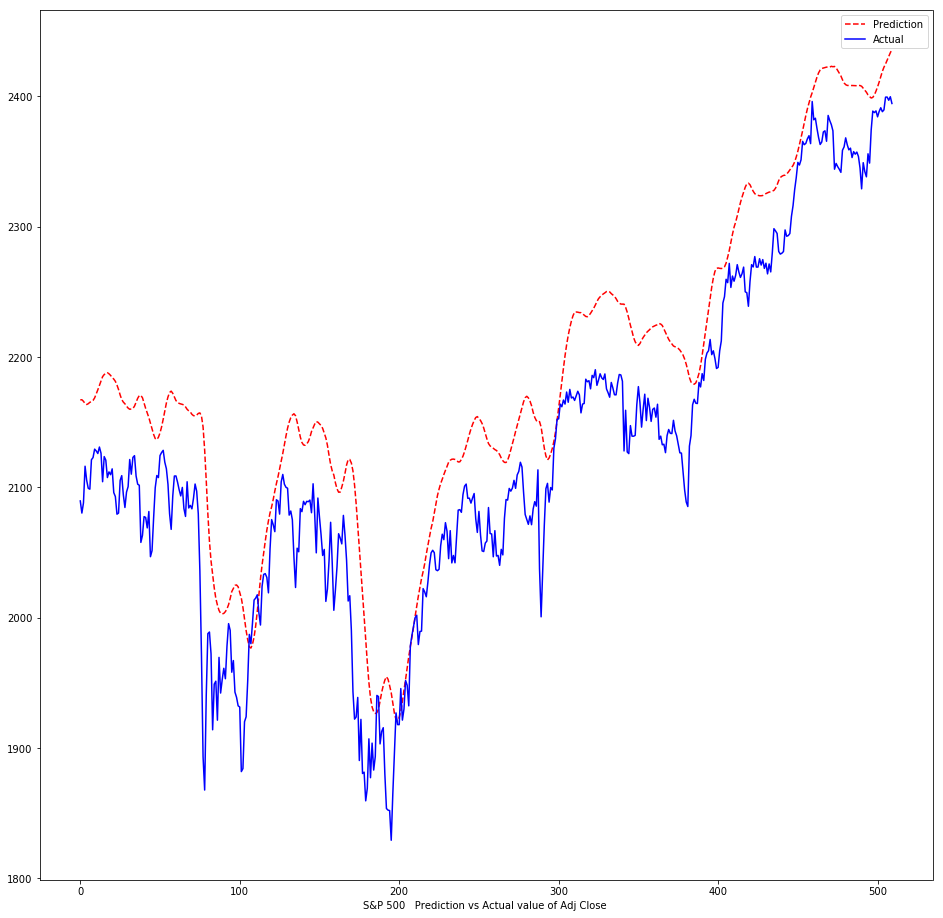

In [23]:
inversedPrediction = denormalize(dfBeforeNorm, predictions)
inversedY_test = denormalize(dfBeforeNorm, y_test)
plt2.plot(inversedPrediction,color='red', label='Prediction', linestyle='--')
plt2.plot(inversedY_test,color='blue', label='Actual',linestyle='-')
plt2.xlabel('S&P 500   Prediction vs Actual value of Adj Close ')
plt2.legend(loc='best')
plt2.show()
